<a href="https://colab.research.google.com/github/DianaElena99/DataScience-Crashcourse/blob/main/TimeSeriesLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series with LSTM 
Applied on a stock dataset

# 1. Dataset preprocessing

Load the csv file, drop the unnecessary columns and entries, and split the dataset into training and testing.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [28]:
_dataset = pd.read_csv("stock_data.csv",index_col=['DATE'], parse_dates=['DATE'])
_dataset.head()

,TICKER,FIGI,TYPE,FREQUENCY,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_OPEN,ADJ_HIGH,ADJ_LOW,ADJ_CLOSE,ADJ_VOLUME,ADJ_FACTOR,EX_DIVIDEND,SPLIT_RATIO
DATE,,,,,,,,,,,,,,,,,
2013-01-04,GEF,BBG000BLFQH8,EOD,daily,46.31,47.6198,46.23,47.37,248000.0,38.517220,39.606614,38.450681,39.398849,248000.0,NaN,0.0,1.0
2013-01-03,GEF,BBG000BLFQH8,EOD,daily,46.43,46.5200,46.14,46.48,131300.0,38.617027,38.691882,38.375826,38.658613,131300.0,NaN,0.0,1.0
2013-01-02,GEF,BBG000BLFQH8,EOD,daily,45.38,46.5400,45.16,46.41,184900.0,37.743715,38.708516,37.560735,38.600392,184900.0,NaN,0.0,1.0
2018-06-05,GF,BBG000C3C6S2,Intraday,daily,18.86,18.9100,18.87,18.87,10000.0,18.860000,18.910000,18.870000,18.870000,10000.0,NaN,0.0,1.0
2018-06-04,GF,BBG000C3C6S2,EOD,daily,18.86,18.8900,18.79,18.81,39095.0,18.860000,18.890000,18.790000,18.810000,39095.0,NaN,0.0,1.0


In [29]:
_dataset = _dataset[_dataset.TICKER != 'GEF']
_dataset.head()

,TICKER,FIGI,TYPE,FREQUENCY,OPEN,HIGH,LOW,CLOSE,VOLUME,ADJ_OPEN,ADJ_HIGH,ADJ_LOW,ADJ_CLOSE,ADJ_VOLUME,ADJ_FACTOR,EX_DIVIDEND,SPLIT_RATIO
DATE,,,,,,,,,,,,,,,,,
2018-06-05,GF,BBG000C3C6S2,Intraday,daily,18.86,18.910,18.8700,18.87,10000.0,18.86,18.910,18.8700,18.87,10000.0,NaN,0.0,1.0
2018-06-04,GF,BBG000C3C6S2,EOD,daily,18.86,18.890,18.7900,18.81,39095.0,18.86,18.890,18.7900,18.81,39095.0,NaN,0.0,1.0
2018-06-01,GF,BBG000C3C6S2,EOD,daily,18.58,18.760,18.5800,18.74,17468.0,18.58,18.760,18.5800,18.74,17468.0,NaN,0.0,1.0
2018-05-31,GF,BBG000C3C6S2,EOD,daily,18.52,18.520,18.3012,18.49,22384.0,18.52,18.520,18.3012,18.49,22384.0,NaN,0.0,1.0
2018-05-30,GF,BBG000C3C6S2,EOD,daily,18.47,18.678,18.4700,18.65,22633.0,18.47,18.678,18.4700,18.65,22633.0,NaN,0.0,1.0


In [30]:
_DROP_COLS = ['SPLIT_RATIO', 'EX_DIVIDEND', 'ADJ_FACTOR', 'ADJ_VOLUME', 'ADJ_CLOSE', 'ADJ_LOW', 'ADJ_HIGH', 'ADJ_OPEN', 'FREQUENCY', 'TYPE', 'FIGI']
_dataset.drop(_DROP_COLS, axis=1, inplace=True)
_dataset.head()

,TICKER,OPEN,HIGH,LOW,CLOSE,VOLUME
DATE,,,,,,
2018-06-05,GF,18.86,18.910,18.8700,18.87,10000.0
2018-06-04,GF,18.86,18.890,18.7900,18.81,39095.0
2018-06-01,GF,18.58,18.760,18.5800,18.74,17468.0
2018-05-31,GF,18.52,18.520,18.3012,18.49,22384.0
2018-05-30,GF,18.47,18.678,18.4700,18.65,22633.0


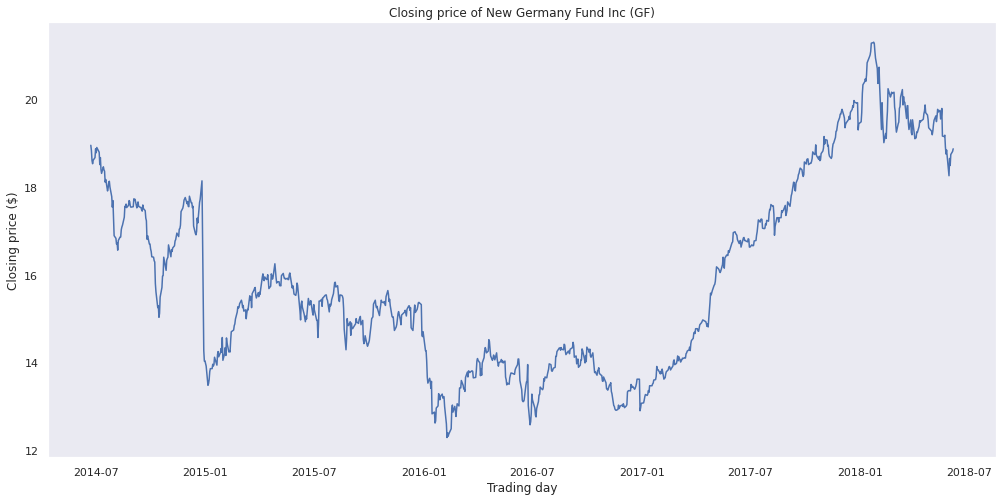

In [31]:
plt.figure(figsize=(17, 8))
plt.plot(_dataset.CLOSE)
plt.title('Closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
plt.grid(False)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
X = _dataset.iloc[:, 1:-1]
Y = _dataset.iloc[: , -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0)

In [34]:
from sklearn.preprocessing import StandardScaler

_scaler = StandardScaler()
_scaler.fit_transform(X_train, Y_train)
_scaler.transform(X_test)


array([[ 1.06047897e+00,  1.07770713e+00,  1.09476097e+00,
         1.09485815e+00],
       [-1.71559316e-01, -2.12161636e-01, -1.69175922e-01,
        -2.06864293e-01],
       [ 1.71059512e+00,  1.66606832e+00,  1.72444793e+00,
         1.68327126e+00],
       [ 1.39690271e+00,  1.34925845e+00,  1.39135265e+00,
         1.34501445e+00],
       [-6.94379992e-01, -7.32634998e-01, -7.62359299e-01,
        -7.83588283e-01],
       [-7.53481459e-01, -7.91471117e-01, -7.78329620e-01,
        -7.79039987e-01],
       [-7.53481459e-01, -7.19057432e-01, -7.21292757e-01,
        -7.47201911e-01],
       [-3.35224919e-01, -3.34359729e-01, -3.33442088e-01,
        -3.01468860e-01],
       [-3.26132385e-01, -3.16256308e-01, -2.92375546e-01,
        -2.83275674e-01],
       [-1.20356187e+00, -1.22142737e+00, -1.17302471e+00,
        -1.19752874e+00],
       [-8.12582927e-01, -8.50307236e-01, -9.71798660e-01,
        -8.70005916e-01],
       [-9.26239596e-01, -8.64201612e-01, -8.94684821e-01,
      

# 2. Neural Network Architecture

In this model, LSTM is the main type of layer. More about it in the Tensorflow documentation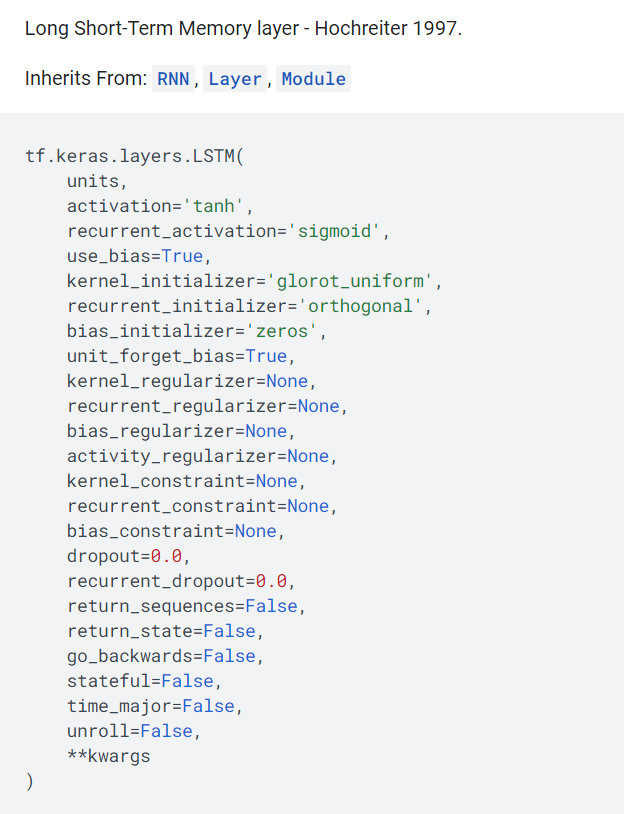

In [35]:
from tensorflow import keras 
import tensorflow as tf
from keras.layers import LSTM, Bidirectional, Lambda, Dense
from keras.models import Sequential

In [36]:
_model = Sequential()
_model.add(Lambda(lambda x: tf.expand_dims(x, axis=-1),  input_shape=[None]))
_model.add(Bidirectional(LSTM(1024, return_sequences=True)))
_model.add(Bidirectional(LSTM(512, return_sequences=True)))
_model.add(Bidirectional(LSTM(256, return_sequences=True)))
_model.add(Bidirectional(LSTM(128, return_sequences=True)))
_model.add(Bidirectional(LSTM(64)))
_model.add(Dense(1))

In [37]:
_model.compile(loss=tf.keras.losses.Huber(), optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics=["mae"])


In [38]:
_history = _model.fit(X_train, Y_train, epochs=20)


Epoch 1/20
25/25 [==============================] - 36s 808ms/step - loss: 23978.4766 - mae: 23978.9766
Epoch 2/20
25/25 [==============================] - 20s 812ms/step - loss: 23971.4883 - mae: 23971.9883
Epoch 3/20
25/25 [==============================] - 21s 860ms/step - loss: 23967.9473 - mae: 23968.4473
Epoch 4/20
25/25 [==============================] - 21s 810ms/step - loss: 23964.5020 - mae: 23965.0020
Epoch 5/20
25/25 [==============================] - 20s 805ms/step - loss: 23961.0977 - mae: 23961.5977
Epoch 6/20
25/25 [==============================] - 21s 824ms/step - loss: 23957.7383 - mae: 23958.2383
Epoch 7/20
25/25 [==============================] - 20s 814ms/step - loss: 23954.4102 - mae: 23954.9102
Epoch 8/20
25/25 [==============================] - 20s 806ms/step - loss: 23951.1113 - mae: 23951.6113
Epoch 9/20
25/25 [==============================] - 21s 822ms/step - loss: 23947.8242 - mae: 23948.3242
Epoch 10/20
25/25 [==============================] - 20s 812ms/s

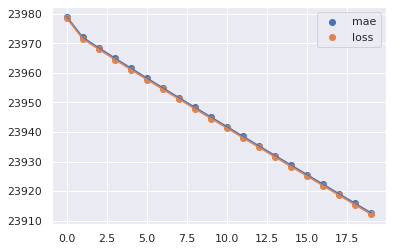

In [41]:

plt.scatter([i for i in range(20)], _history.history['mae'], label='mae')
plt.scatter([i for i in range(20)], _history.history['loss'], label='loss')
plt.plot(_history.history['mae'])
plt.plot(_history.history['loss'])
plt.legend()
plt.show()

In [42]:
_model.evaluate(X_test, Y_test)

7/7 [==============================] - 7s 160ms/step - loss: 24927.9258 - mae: 24928.4258


[24927.92578125, 24928.42578125]